# 数据变换

In [1]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
from torchvision import datasets, transforms
import torch.backends.cudnn as cudnn
import matplotlib
import matplotlib.pyplot as plt
import time
import os
import yaml
import math
from shutil import copyfile
import random
import numpy as np
from torchvision import models
from torch.nn import init
from torch.autograd import Variable
import pretrainedmodels
import tensorwatch as tw

In [2]:
class RandomErasing(object):
    """ 随机选择图像中的矩形区域并擦除其像素。
    参数：
        probability：执行随机擦除操作的概率。
        sl：被擦除区域相对于输入图像的最小比例。
        sh：删除区域相对于输入图像的最大比例。
        r1：被擦除区域的最小纵横比。
        mean：擦除值。 
    """
    
    def __init__(self, probability = 0.5, sl = 0.02, sh = 0.4, r1 = 0.3, mean=[0.4914, 0.4822, 0.4465]):
        self.probability = probability
        self.mean = mean
        self.sl = sl
        self.sh = sh
        self.r1 = r1
       
    def __call__(self, img):

        if random.uniform(0, 1) > self.probability:
            return img

        for attempt in range(100):
            area = img.size()[1] * img.size()[2]
       
            target_area = random.uniform(self.sl, self.sh) * area
            aspect_ratio = random.uniform(self.r1, 1/self.r1)

            h = int(round(math.sqrt(target_area * aspect_ratio)))
            w = int(round(math.sqrt(target_area / aspect_ratio)))

            if w < img.size()[2] and h < img.size()[1]:
                x1 = random.randint(0, img.size()[1] - h)
                y1 = random.randint(0, img.size()[2] - w)
                if img.size()[0] == 3:
                    img[0, x1:x1+h, y1:y1+w] = self.mean[0]
                    img[1, x1:x1+h, y1:y1+w] = self.mean[1]
                    img[2, x1:x1+h, y1:y1+w] = self.mean[2]
                else:
                    img[0, x1:x1+h, y1:y1+w] = self.mean[0]
                return img

        return img

In [3]:
data_dir = "/home/yxy/ReID/data/DukeMTMC-reID/pytorch/"

trainset = datasets.ImageFolder(os.path.join(data_dir, 'train'),
                                               transforms.Compose([
                                                   #transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0),
                                                   transforms.Resize((256,128), interpolation=3),
                                                   transforms.Pad(10),
                                                   transforms.RandomCrop((256,128)),
                                                   transforms.RandomHorizontalFlip(),
                                                   transforms.ToTensor(),
                                                   transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
                                                   RandomErasing(probability = 0, mean=[0.0, 0.0, 0.0])
                                               ]))
trainloaders = torch.utils.data.DataLoader(trainset, batch_size=32,
                                             shuffle=True, num_workers=8, pin_memory=True) 


testset = datasets.ImageFolder(os.path.join(data_dir, 'val'),
                                            transforms.Compose([
                                                transforms.Resize(size=(256,128),interpolation=3), #Image.BICUBIC
                                                transforms.ToTensor(),
                                                transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                                            ]))
testloaders = torch.utils.data.DataLoader(testset, batch_size=32,
                                             shuffle=True, num_workers=8, pin_memory=True)

print(len(trainset))
print(trainloaders)
print(len(testset))

15820
702


In [4]:
for i,data in enumerate(trainloaders):
    inputs,labels= data
    print(inputs.shape)

torch.Size([32, 3, 256, 128])
torch.Size([32, 3, 256, 128])
torch.Size([32, 3, 256, 128])
torch.Size([32, 3, 256, 128])
torch.Size([32, 3, 256, 128])
torch.Size([32, 3, 256, 128])
torch.Size([32, 3, 256, 128])
torch.Size([32, 3, 256, 128])
torch.Size([32, 3, 256, 128])
torch.Size([32, 3, 256, 128])
torch.Size([32, 3, 256, 128])
torch.Size([32, 3, 256, 128])
torch.Size([32, 3, 256, 128])
torch.Size([32, 3, 256, 128])
torch.Size([32, 3, 256, 128])
torch.Size([32, 3, 256, 128])
torch.Size([32, 3, 256, 128])
torch.Size([32, 3, 256, 128])
torch.Size([32, 3, 256, 128])
torch.Size([32, 3, 256, 128])
torch.Size([32, 3, 256, 128])
torch.Size([32, 3, 256, 128])
torch.Size([32, 3, 256, 128])
torch.Size([32, 3, 256, 128])
torch.Size([32, 3, 256, 128])
torch.Size([32, 3, 256, 128])
torch.Size([32, 3, 256, 128])
torch.Size([32, 3, 256, 128])
torch.Size([32, 3, 256, 128])
torch.Size([32, 3, 256, 128])
torch.Size([32, 3, 256, 128])
torch.Size([32, 3, 256, 128])
torch.Size([32, 3, 256, 128])
torch.Size

torch.Size([32, 3, 256, 128])
torch.Size([32, 3, 256, 128])
torch.Size([32, 3, 256, 128])
torch.Size([32, 3, 256, 128])
torch.Size([32, 3, 256, 128])
torch.Size([32, 3, 256, 128])
torch.Size([32, 3, 256, 128])
torch.Size([32, 3, 256, 128])
torch.Size([32, 3, 256, 128])
torch.Size([32, 3, 256, 128])
torch.Size([32, 3, 256, 128])
torch.Size([32, 3, 256, 128])
torch.Size([32, 3, 256, 128])
torch.Size([32, 3, 256, 128])
torch.Size([32, 3, 256, 128])
torch.Size([32, 3, 256, 128])
torch.Size([32, 3, 256, 128])
torch.Size([32, 3, 256, 128])
torch.Size([32, 3, 256, 128])
torch.Size([32, 3, 256, 128])
torch.Size([32, 3, 256, 128])
torch.Size([32, 3, 256, 128])
torch.Size([32, 3, 256, 128])
torch.Size([32, 3, 256, 128])
torch.Size([32, 3, 256, 128])
torch.Size([32, 3, 256, 128])
torch.Size([32, 3, 256, 128])
torch.Size([32, 3, 256, 128])
torch.Size([32, 3, 256, 128])
torch.Size([32, 3, 256, 128])
torch.Size([32, 3, 256, 128])
torch.Size([32, 3, 256, 128])
torch.Size([32, 3, 256, 128])
torch.Size

In [5]:
print(inputs.shape)

torch.Size([12, 3, 256, 128])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[-0.558952   -0.558952   -0.558952   ... -0.558952   -0.558952
   -0.558952  ]
  [-0.558952   -0.558952   -0.558952   ... -0.558952   -0.558952
   -0.558952  ]
  [-0.558952   -0.558952   -0.558952   ... -0.558952   -0.558952
   -0.558952  ]
  ...
  [-0.558952   -0.558952   -0.558952   ...  0.44284612  0.45997086
    0.485658  ]
  [-0.558952   -0.558952   -0.558952   ...  0.45140848  0.4770956
    0.50278276]
  [-0.558952   -0.558952   -0.558952   ...  0.45997086  0.485658
    0.51134515]]

 [[-0.5178571  -0.5178571  -0.5178571  ... -0.5178571  -0.5178571
   -0.5178571 ]
  [-0.5178571  -0.5178571  -0.5178571  ... -0.5178571  -0.5178571
   -0.5178571 ]
  [-0.5178571  -0.5178571  -0.5178571  ... -0.5178571  -0.5178571
   -0.5178571 ]
  ...
  [-0.5178571  -0.5178571  -0.5178571  ...  0.50630254  0.52380955
    0.55007005]
  [-0.5178571  -0.5178571  -0.5178571  ...  0.515056    0.5413165
    0.567577  ]
  [-0.5178571  -0.5178571  -0.5178571  ...  0.52380955  0.55007005
    0.57633054]]

 

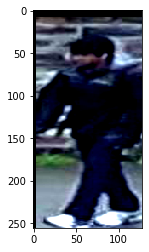

In [6]:
def imshow(img):
    img = img / 2 + 0.5   #-1,1 to 0,1
    npimg = img.numpy()   #转为numpy数组
    print(npimg)
    plt.imshow(np.transpose(npimg,(1,2,0)))  #3*32*32转为32*32*3
    plt.show()

#show images
imshow(trainset[0][0])

# 搭建模型

In [7]:
def weights_init_kaiming(m):
    classname = m.__class__.__name__
    # print(classname)
    if classname.find('Conv') != -1:
        init.kaiming_normal_(m.weight.data, a=0, mode='fan_in') # For old pytorch, you may use kaiming_normal.
    elif classname.find('Linear') != -1:
        init.kaiming_normal_(m.weight.data, a=0, mode='fan_out')
        init.constant_(m.bias.data, 0.0)
    elif classname.find('BatchNorm1d') != -1:
        init.normal_(m.weight.data, 1.0, 0.02)
        init.constant_(m.bias.data, 0.0)

def weights_init_classifier(m):
    classname = m.__class__.__name__
    if classname.find('Linear') != -1:
        init.normal_(m.weight.data, std=0.001)
        init.constant_(m.bias.data, 0.0)

In [8]:
# Defines the new fc layer and classification layer
class ClassBlock(nn.Module):
    def __init__(self, input_dim, class_num, droprate, relu=False, bnorm=True, num_bottleneck=512, linear=True, return_f = False):
        super(ClassBlock, self).__init__()
        self.return_f = return_f
        add_block = []
        if linear:
            add_block += [nn.Linear(input_dim, num_bottleneck)]
        else:
            num_bottleneck = input_dim
        if bnorm:
            add_block += [nn.BatchNorm1d(num_bottleneck)]
        if relu:
            add_block += [nn.LeakyReLU(0.1)]
        if droprate>0:
            add_block += [nn.Dropout(p=droprate)]
        add_block = nn.Sequential(*add_block)
        add_block.apply(weights_init_kaiming)

        classifier = []
        classifier += [nn.Linear(num_bottleneck, class_num)]
        classifier = nn.Sequential(*classifier)
        classifier.apply(weights_init_classifier)

        self.add_block = add_block
        self.classifier = classifier
    def forward(self, x):
        x = self.add_block(x)
        if self.return_f:
            f = x
            x = self.classifier(x)
            return x,f
        else:
            x = self.classifier(x)
            return x

In [9]:
class ft_net(nn.Module):

    def __init__(self, class_num, droprate=0.5, stride=2):
        super(ft_net, self).__init__()
        model_ft = models.resnet50(pretrained=True)
        if stride == 1:
            model_ft.layer4[0].downsample[0].stride = (1,1)
            model_ft.layer4[0].conv2.stride = (1,1)
        model_ft.avgpool = nn.AdaptiveAvgPool2d((1,1))
        self.model = model_ft
        self.classifier = ClassBlock(2048, class_num, droprate)

    def forward(self, x):
        x = self.model.conv1(x)
        x = self.model.bn1(x)
        x = self.model.relu(x)
        x = self.model.maxpool(x)
        x = self.model.layer1(x)
        x = self.model.layer2(x)
        x = self.model.layer3(x)
        x = self.model.layer4(x)
        x = self.model.avgpool(x)
        x = x.view(x.size(0), x.size(1))
        x = self.classifier(x)
        return x

ft_net(
  (model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (downsample): Sequential(
          (0): Conv2d(6

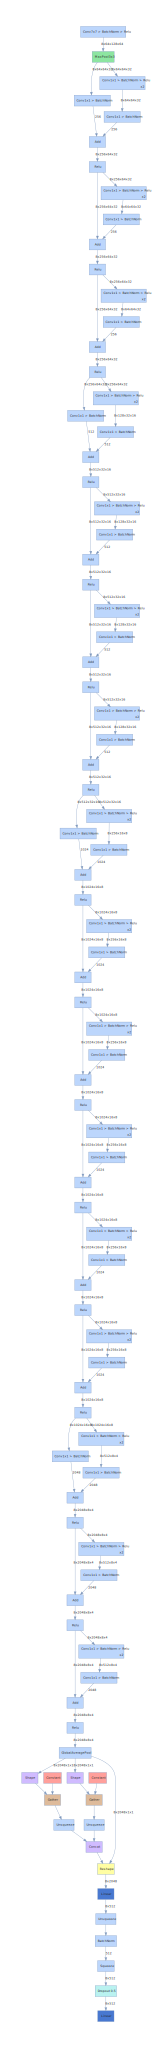

In [10]:
net = ft_net(702,stride=2)
print(net)
tw.draw_model(net,[8, 3, 256, 128])

# 网络测试

tensor(1.)
tensor([[ 1.1135e-02,  2.4897e-02, -8.5287e-03,  ...,  3.8375e-02,
         -1.1456e-02,  1.0785e-02],
        [-6.1055e-02, -2.0094e-03, -3.8339e-02,  ..., -1.0132e-02,
         -3.6017e-02,  4.8938e-03],
        [ 3.1425e-03, -5.4756e-03,  7.0819e-03,  ...,  3.0226e-03,
          3.7887e-02, -6.0658e-03],
        ...,
        [-4.4348e-05,  1.9642e-02, -2.0852e-02,  ...,  2.8220e-02,
          4.0342e-02, -8.1824e-02],
        [ 4.6093e-02, -5.8377e-02,  1.9965e-03,  ...,  1.8601e-03,
         -4.7861e-02, -6.9580e-03],
        [ 3.5557e-02, -1.2922e-03,  1.0920e-02,  ..., -2.4002e-02,
         -8.7952e-03,  2.1132e-03]], grad_fn=<AddmmBackward>)


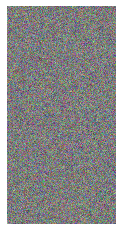

In [11]:
x = torch.randn((10,3,256,128))
x = x / torch.max(x)
print(torch.max(x))
im = (x[0]-torch.min(x[0]))/(torch.max(x[0])-torch.min(x[0]))
plt.imshow(np.transpose(im,(1,2,0)))
plt.axis('off')

print(net(x))

# 开始训练

In [12]:
device = torch.device("cuda:7" if torch.cuda.is_available() else "cpu")
print(device)
net.to(device) #迁移到GPU
net

cpu


ft_net(
  (model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (downsample): Sequential(
          (0): Conv2d(6

In [13]:
criterion = nn.CrossEntropyLoss() #交叉熵损失函数

In [14]:
#为不同子网络设置不同的学习率
ignored_params = list(map(id,net.classifier.parameters()))
base_params = filter(lambda p: id(p) not in ignored_params, net.parameters())
optimizer = optim.SGD([
             {'params': base_params, 'lr': 0.1*0.05},
             {'params': net.classifier.parameters(), 'lr': 0.05}
         ], weight_decay=5e-4, momentum=0.9, nesterov=True)

#warm_up = 0.1
#warm_iteration = round(dataset_sizes['train']/32) * 5
num_epochs = 51
for epoch in range(num_epochs):
    print('Epoch{}/{}'.format(epoch,num_epochs - 1))
    print('-' * 20)
    
    running_loss = 0.0 
    running_corrects = 0.0
    
    for i,data in enumerate(trainloaders):
        inputs,labels = data
        now_batch_size, c, h, w = inputs.shape
        if now_batch_size < 32: # 跳出最后一次batch
            continue
        inputs,labels = inputs.to(device), labels.to(device)
        
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = net(inputs)
        _,preds = torch.max(outputs.data, 1)
        
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()* now_batch_size
        running_corrects += float(torch.sum(preds == labels.data))
        
        
    epoch_loss = running_loss / len(trainset)
    epoch_acc = running_corrects / len(trainset)
        
    print(' Loss: {:.4f} Acc: {:.4f}'.format(epoch_loss, epoch_acc))
        
        

In [15]:
# save model
def save_network(network, epoch_label):
    save_filename = 'net_%s.pth'% epoch_label
    save_path = os.path.join('./duke/model/',save_filename)
    torch.save(network.state_dict(),save_path)

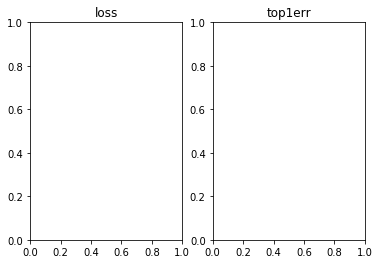

In [16]:
# Draw Curve
x_epoch = []
fig = plt.figure()
ax0 = fig.add_subplot(121, title="loss")
ax1 = fig.add_subplot(122, title="top1err")
def draw_curve(current_epoch):
    x_epoch.append(current_epoch)
    ax0.plot(x_epoch, y_loss, 'bo-', label='train')
    ax0.plot(x_epoch, y_loss1, 'ro-', label='val')
    ax1.plot(x_epoch, y_err, 'bo-', label='train')
    ax1.plot(x_epoch, y_err1, 'ro-', label='val')
    if current_epoch == 0:
        ax0.legend()
        ax1.legend()
    save_jpg = 'train_%s.jpg' % current_epoch
    fig.savefig( os.path.join('./duke/img/',save_jpg))

In [17]:
#warm_up = 0.1
#warm_iteration = round(dataset_sizes['train']/32) * 5
y_loss = []
y_loss1 = []
y_err= []
y_err1 = []
num_epochs = 61

for epoch in range(num_epochs):
    print('Epoch{}/{}'.format(epoch,num_epochs - 1))
    print('-' * 20)
    
    running_loss = 0.0 
    running_corrects = 0.0
    running_loss1 = 0.0 
    running_corrects1 = 0.0
    
    for i,data in enumerate(trainloaders):
        inputs,labels = data
        now_batch_size, c, h, w = inputs.shape
        if now_batch_size < 32: # 跳出最后一次batch
            continue
        inputs,labels = Variable(inputs.to(device)), Variable(labels.to(device))
        
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = net(inputs)
        _,preds = torch.max(outputs.data, 1)
        
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()* now_batch_size
        running_corrects += float(torch.sum(preds == labels.data))
        
    for i,data in enumerate(testloaders):
        inputs,labels = data
        now_batch_size, c, h, w = inputs.shape
        if now_batch_size < 32: # 跳出最后一次batch
            continue
        inputs,labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        with torch.no_grad():
            outputs = net(inputs)
        _, preds = torch.max(outputs.data, 1)
        loss = criterion(outputs, labels)
        
        running_loss1 += loss.item()* now_batch_size
        running_corrects1 += float(torch.sum(preds == labels.data))
        
        
    epoch_loss = running_loss / len(trainset)
    epoch_acc = running_corrects / len(trainset)
    
    epoch_loss1 = running_loss1 / len(testset)
    epoch_acc1 = running_corrects1 / len(testset)
    
    y_loss.append(epoch_loss)
    y_loss1.append(epoch_loss1)    
    y_err.append(1.0 - epoch_acc)
    y_err1.append(1.0- epoch_acc1)
    
    if epoch % 10 == 9:
        save_network(net, epoch)
    draw_curve(epoch)
    
    print('{} Loss: {:.4f} Acc: {:.4f}'.format('train', epoch_loss, epoch_acc))
    print('{} Loss: {:.4f} Acc: {:.4f}'.format('test', epoch_loss1, epoch_acc1))
    
print('train finished')

Epoch0/60
--------------------
train Loss: 3.4919 Acc: 0.3542
test Loss: 1.5900 Acc: 0.5812
Epoch1/60
--------------------
train Loss: 1.0337 Acc: 0.7449
test Loss: 0.9907 Acc: 0.7037
Epoch2/60
--------------------
train Loss: 0.5931 Acc: 0.8505
test Loss: 0.8076 Acc: 0.7507
Epoch3/60
--------------------
train Loss: 0.3903 Acc: 0.9007
test Loss: 0.5644 Acc: 0.8105
Epoch4/60
--------------------
train Loss: 0.2469 Acc: 0.9384
test Loss: 0.5025 Acc: 0.8177
Epoch5/60
--------------------
train Loss: 0.2046 Acc: 0.9526
test Loss: 0.4108 Acc: 0.8476
Epoch6/60
--------------------
train Loss: 0.1584 Acc: 0.9645
test Loss: 0.4128 Acc: 0.8533
Epoch7/60
--------------------
train Loss: 0.1148 Acc: 0.9776
test Loss: 0.3471 Acc: 0.8846
Epoch8/60
--------------------
train Loss: 0.0789 Acc: 0.9866
test Loss: 0.3597 Acc: 0.8832
Epoch9/60
--------------------
train Loss: 0.0741 Acc: 0.9879
test Loss: 0.3761 Acc: 0.8860
Epoch10/60
--------------------
train Loss: 0.0675 Acc: 0.9898
test Loss: 0.2873

In [18]:
torch.save(net.state_dict(), './duke/model/resnet-duke.pth')